# Emotions Detection in Text

In [1]:
# EDA
import pandas as pd
import numpy as np

# Load Data Viz Pkgs
import seaborn as sns

# Load Text Cleaning Pkgs
import neattext.functions as nfx

# Load ML Pkgs
# Estimators
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB

# Transformers
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [2]:
# Load Dataset
df = pd.read_csv("../data/train.csv")

In [3]:
df.head()

,text,label,label_text
0,aloha unfortunately i had to travel inter isla...,9,disappointment
1,and it wa extended by the unelected acton,2,anger
2,are you out of your mind poutingface poutingfa...,2,anger
3,Ironically it’s [NAME] and his family that are...,27,neutral
4,could tell throat starting get sick feeling th...,17,joy


In [4]:
# Value Counts
df['label_text'].value_counts()

joy               47043
anger             29521
disappointment    29209
sadness           15073
neutral            3311
fear               1703
sarcasm            1342
love               1249
surprise            830
admiration          497
amusement           477
disgust             332
approval            329
gratitude           278
annoyance           227
disapproval         215
curiosity           202
relief              164
remorse             160
embarrassment       144
excitement          144
optimism            134
confusion           127
caring              120
nervousness         117
realization          77
desire               65
grief                10
pride                 5
Name: label_text, dtype: int64

In [5]:
# Filter out labels with less than 400 occurrences
emotion_counts = df['label_text'].value_counts()
df = df[df['label_text'].isin(emotion_counts[emotion_counts >= 400].index)]

# Check the result
print(df['label_text'].value_counts())


joy               47043
anger             29521
disappointment    29209
sadness           15073
neutral            3311
fear               1703
sarcasm            1342
love               1249
surprise            830
admiration          497
amusement           477
Name: label_text, dtype: int64


<Axes: xlabel='label_text', ylabel='count'>

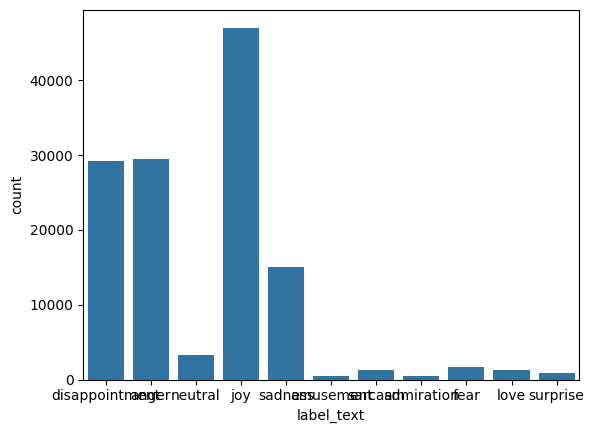

In [6]:
# Plot
sns.countplot(x='label_text',data=df)

In [7]:
# Data Cleaning
dir(nfx)

['BTC_ADDRESS_REGEX',
 'CURRENCY_REGEX',
 'CURRENCY_SYMB_REGEX',
 'Counter',
 'DATE_REGEX',
 'EMAIL_REGEX',
 'EMOJI_REGEX',
 'HASTAG_REGEX',
 'MASTERCard_REGEX',
 'MD5_SHA_REGEX',
 'MOST_COMMON_PUNCT_REGEX',
 'NUMBERS_REGEX',
 'PHONE_REGEX',
 'PoBOX_REGEX',
 'SPECIAL_CHARACTERS_REGEX',
 'STOPWORDS',
 'STOPWORDS_de',
 'STOPWORDS_en',
 'STOPWORDS_es',
 'STOPWORDS_fr',
 'STOPWORDS_ru',
 'STOPWORDS_yo',
 'STREET_ADDRESS_REGEX',
 'TextFrame',
 'URL_PATTERN',
 'USER_HANDLES_REGEX',
 'VISACard_REGEX',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__generate_text',
 '__loader__',
 '__name__',
 '__numbers_dict',
 '__package__',
 '__spec__',
 '_lex_richness_herdan',
 '_lex_richness_maas_ttr',
 'clean_text',
 'defaultdict',
 'digit2words',
 'extract_btc_address',
 'extract_currencies',
 'extract_currency_symbols',
 'extract_dates',
 'extract_emails',
 'extract_emojis',
 'extract_hashtags',
 'extract_html_tags',
 'extract_mastercard_addr',
 'extract_md5sha',
 'extract_numbers',
 'extr

In [8]:
# User handles
df['Clean_Text'] = df['text'].apply(nfx.remove_userhandles)

In [9]:
# Stopwords
df=df.drop('label' , axis=1)
df['Clean_Text'] = df['Clean_Text'].apply(nfx.remove_stopwords)

## We are not removing Special Characters as some of the rows have just Special Characters and it'll result into empty row.

In [10]:
df

,text,label_text,Clean_Text
0,aloha unfortunately i had to travel inter isla...,disappointment,aloha unfortunately travel inter island wife q...
1,and it wa extended by the unelected acton,anger,wa extended unelected acton
2,are you out of your mind poutingface poutingfa...,anger,mind poutingface poutingface act like gopi bah...
3,Ironically it’s [NAME] and his family that are...,neutral,Ironically it’s [NAME] family whiny crybabies ...
4,could tell throat starting get sick feeling th...,joy,tell throat starting sick feeling amused
...,...,...,...
133100,tell currently feeling pretty foolish loading ...,sadness,tell currently feeling pretty foolish loading ...
133101,i supposedly do well feel fake feel like it s ...,disappointment,supposedly feel fake feel like big deal
133102,pretty much nailed it there frowningface,disappointment,pretty nailed frowningface
133103,i feel most passionate and artistic and settle...,joy,feel passionate artistic settled craft


In [11]:
# Features & Labels
Xfeatures = df['Clean_Text']
ylabels = df['label_text']

# It is advisable to split before applying pipelines because it prevents data leakage.

In [12]:
#  Split Data
x_train,x_test,y_train,y_test = train_test_split(Xfeatures,ylabels,test_size=0.2,random_state=42)

In [13]:

# Build Pipeline
from sklearn.pipeline import Pipeline

In [14]:
# LogisticRegression Pipeline
pipe_lr = Pipeline(steps=[('cv',CountVectorizer()),('lr',LogisticRegression())])

In [18]:
# Train and Fit Data
pipe_lr.fit(x_train,y_train)

C:\Users\GHOST\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Pipeline(steps=[('cv', CountVectorizer()), ('lr', LogisticRegression())])

In [19]:
pipe_lr

Pipeline(steps=[('cv', CountVectorizer()), ('lr', LogisticRegression())])

In [20]:
# Check Accuracy
pipe_lr.score(x_test,y_test)

0.7490691336225097

In [1]:
# Make A Prediction
ex1 = "i Hate you "

In [2]:
pipe_lr.predict([ex1])

NameError: name 'pipe_lr' is not defined

In [70]:
# Prediction Prob
pipe_lr.predict_proba([ex1])

array([[0.00193165, 0.00435843, 0.5335175 , 0.22681422, 0.02005031,
        0.03501097, 0.00655304, 0.00961664, 0.14717863, 0.01000909,
        0.00495952]])

In [71]:
# To Know the classes
pipe_lr.classes_

array(['admiration', 'amusement', 'anger', 'disappointment', 'fear',
       'joy', 'love', 'neutral', 'sadness', 'sarcasm', 'surprise'],
      dtype=object)

In [72]:
# Save Model & Pipeline
import joblib
pipeline_file = open("../models/emotion_classifier_pipe_lr.pkl","wb")
joblib.dump(pipe_lr,pipeline_file)
pipeline_file.close()